# **Nom:** NIANG
# **Prenom:** Souna

## Note:
## Les analyses des resultats je les ai mis en ***italique***

In [492]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [493]:
data1=pd.read_csv('data/data_tp1_app.txt',names=['y','x1','x2'],sep=" ")
test1=pd.read_csv('data/data_tp1_dec.txt',names=['y','x1','x2'],sep=" ")
data2=pd.read_csv('data/data_tp2_app.txt',names=['y','x1','x2'],sep=" ")
test2=pd.read_csv('data/data_tp2_dec.txt',names=['y','x1','x2'],sep=" ")
data3=pd.read_csv('data/data_tp3_app.txt',names=['y','x1','x2'],sep=" ")
test3=pd.read_csv('data/data_tp3_dec.txt',names=['y','x1','x2'],sep=" ")

# Estimation de gaussiennes

In [494]:
class Estimateur_Gaussien:
    def __init__(self,type="distance_euclidienne"):
        self.type=type
        self.moy=0
        self.cov=0
            
    def train(self,data):
         self.moy=np.array([np.array(data[data['y']==i][['x1','x2']].mean()) for i in range(1,6)])
         self.cov=np.array([np.cov(np.array(data[data['y']==i][['x1','x2']]).T) for i in range(1,6)])
        
    def predi_distance_euclidien(self,x):
            x=np.array(x)
            dist=np.array([np.linalg.norm(x-self.moy[i]) for i in range(5)])
            top1=np.argmin(dist)
            dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
            top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
            return top1+1,top2+1
        
    def predi_distance_mahanalobis(self,x):
             x=np.array(x)
             dist=[(x-self.moy[i]).T@np.linalg.inv(self.cov[i])@(x-self.moy[i])+np.log(np.linalg.det(self.cov[i])) for i in range(5)]
             top1=np.argmin(dist)
             dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
             top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
             return top1+1,top2+1
    def predict(self,x):
         if self.type=="distance_euclidienne":
            return self.predi_distance_euclidien(x)
         else:
            return self.predi_distance_mahanalobis(x)
        
    def calcul_matrice(self,test):
          #colone et index servent pour la matrice de confusion
          columns = ['1', '2', '3','4','5'] 
          index = ['1', '2','3', '4','5']
          y=list(test['y'])
          top1=[self.predict(k)[0] for k in test[['x1','x2']].values.tolist()] #taux de bonne classification top1
          top2=[self.predict(k)[1] for k in test[['x1','x2']].values.tolist()] #taux de bonne classification top2
          matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
          taux_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)*100
          taux_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)*100
          df = pd.DataFrame(matrice, columns=columns,index = index)
          plt.title(f'Taux top1= {taux_top1}% et Taux top2= {taux_top2}%')
          return taux_top1,taux_top2,sns.heatmap(df,annot = True, cbar = True, cmap = 'plasma')
        
    def plot_decision_multi(self,x1_min, x1_max, x2_min, x2_max,figure,sample = 300):
        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.predict([x1,x2])[0] for x1 in x1_list] for x2 in x2_list]
        l = np.shape(np.unique(y_grid_pred))[0] - 1
        figure.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)
        
    def visualisation(self,test,figure):
        test=test[['x1','x2']]
        y_pred=[self.predict(i)[0] for i in test.values.tolist()]
        test['y_predi']=y_pred
        figure.set_title(f'{self.type}')
        for label in range(1,6):
            figure.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
        figure.legend()
        self.plot_decision_multi(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),figure)
        figure.axis('equal')
        
    

# Estimateur Gaussien avec distance euclidienne

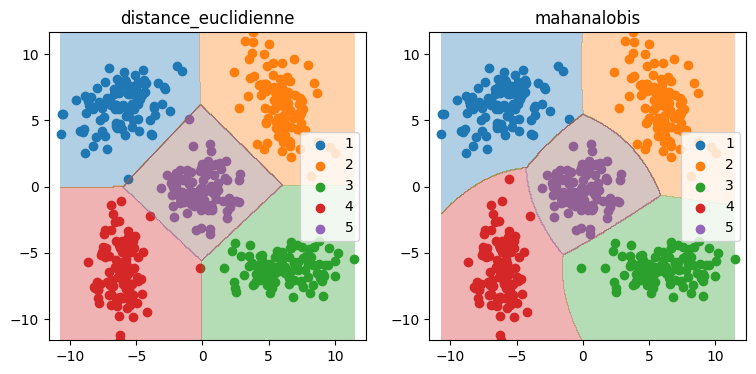

In [495]:
estimat1=Estimateur_Gaussien(type="distance_euclidienne")
estimat2=Estimateur_Gaussien(type='mahanalobis')
estimat1.train(data1)
estimat2.train(data1)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
estimat1.visualisation(test1,ax1)
estimat2.visualisation(test1,ax2)

(99.2, 0.8, <Axes: title={'center': 'Taux top1= 99.2% et Taux top2= 0.8%'}>)

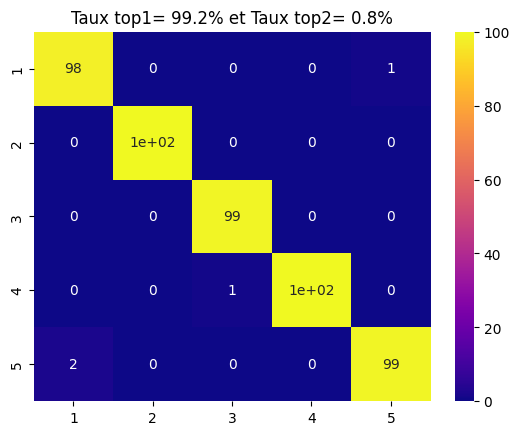

In [496]:
estimat1.calcul_matrice(test1)

(99.6, 0.2, <Axes: title={'center': 'Taux top1= 99.6% et Taux top2= 0.2%'}>)

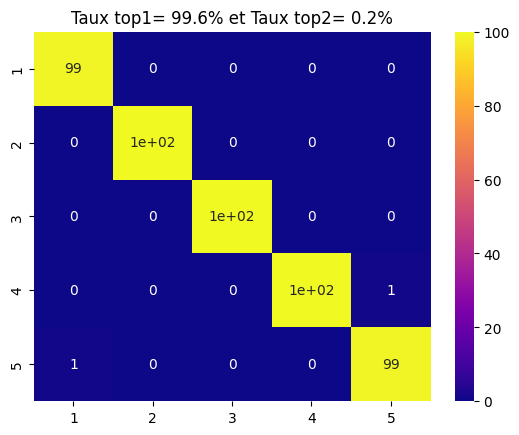

In [497]:
estimat2.calcul_matrice(test1)

### ***Sur le premier dataset le classifieur gaussien avec distance Mahanalobis est sensiblement plus perfomant(top1) que celui avec la distance euclidienne***
### ***Le taux top2 de la distance euclidienne est plus elevé que celui de Mahanalobis***

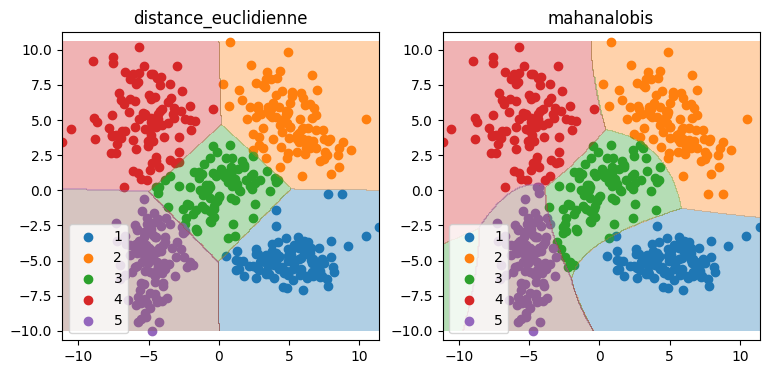

In [498]:
estimat1=Estimateur_Gaussien(type="distance_euclidienne")
estimat2=Estimateur_Gaussien(type='mahanalobis')
estimat1.train(data2)
estimat2.train(data2)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
estimat1.visualisation(test2,ax1)
estimat2.visualisation(test2,ax2)

(94.6, 5.0, <Axes: title={'center': 'Taux top1= 94.6% et Taux top2= 5.0%'}>)

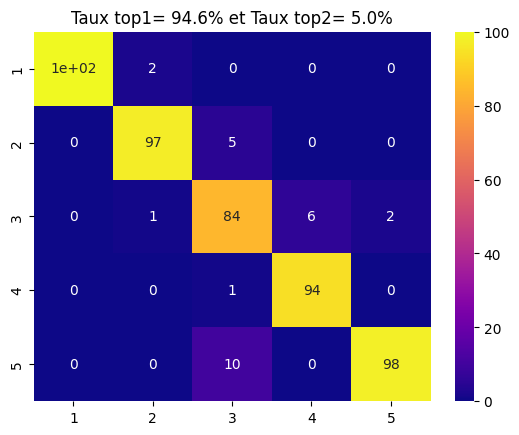

In [499]:
estimat1.calcul_matrice(test2)

(94.6, 4.8, <Axes: title={'center': 'Taux top1= 94.6% et Taux top2= 4.8%'}>)

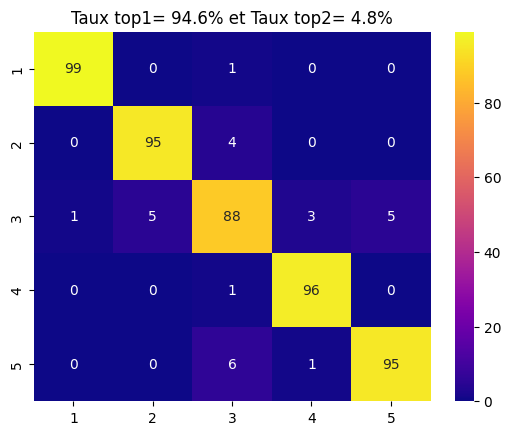

In [500]:
estimat2.calcul_matrice(test2)

### ***Concernant le taux Top1  sur le deuxiéme dataset les deux classieurs (**distance Mahanalobis** et **distance euclidienne**) ont le meme score***
### ***Pour le taux top2 celui de la distance euclidienne est plus elevé que celui de Mahanalobis***

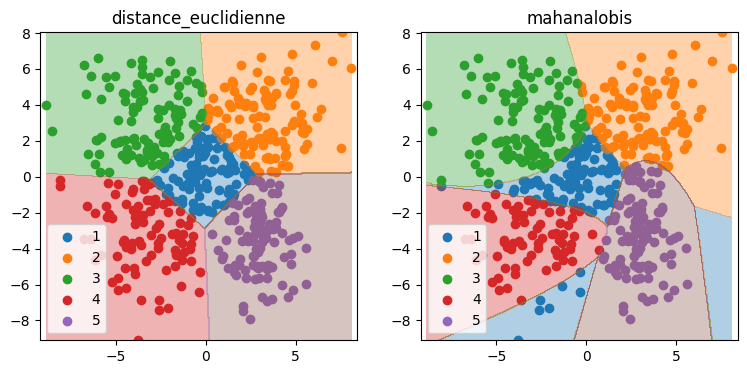

In [501]:
estimat1=Estimateur_Gaussien(type="distance_euclidienne")
estimat2=Estimateur_Gaussien(type='mahanalobis')
estimat1.train(data3)
estimat2.train(data3)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
estimat1.visualisation(test3,ax1)
estimat2.visualisation(test3,ax2)

(72.8,
 16.400000000000002,
 <Axes: title={'center': 'Taux top1= 72.8% et Taux top2= 16.400000000000002%'}>)

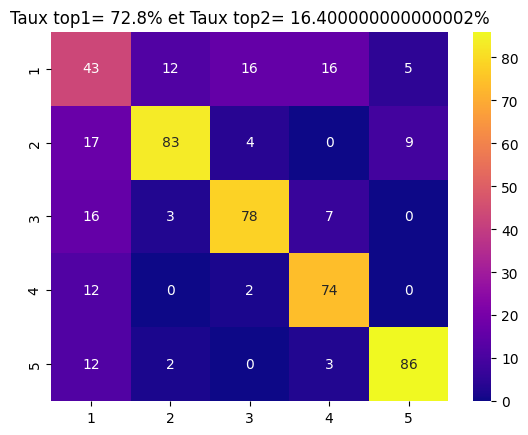

In [502]:
estimat1.calcul_matrice(test3)

(69.8, 17.4, <Axes: title={'center': 'Taux top1= 69.8% et Taux top2= 17.4%'}>)

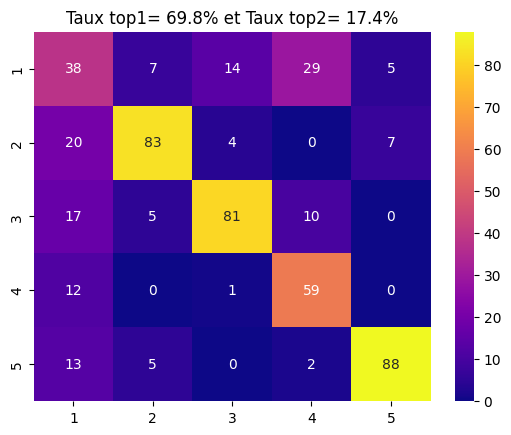

In [503]:
estimat2.calcul_matrice(test3)

### ***Sur le troisiéme dataset le classieur gaussien avec **distance euclidienne** est  ***plus perfomant***(top1) que celui avec la  la distance Mahanalobis***
### ***Le taux top2 de la distance Mahanalobis est par contre est plus elevé que celui de la distance  euclidienne***

### ***La distance de mahanalobis est plus performant quand les données ne sont pas isotrope c'est-à-dire quand les variables qui composent les données ne sont pas indépendantes .La distance de Mahanalobis prend en compte la variance des données . La distance euclidienne donne de meilleur resultats quand les données sont isotropes***

# La classe Classe_Non_Parametrique sert de superclasse à la classe Parzen et KPPV

In [504]:
class Classe_Non_Parametrique:
    """Cette classe sert de superclasse pour les methode non parametrique(Kppv et Parzen)
    """
    def __init__(self):
        self.data_train=""
    def predi(self,x):
         pass
    def train(self,data):
        """permet de recuperer les données d'entrainement

        Args:
            data (DataFrame): données d'entrainement
        """
        self.data_train=data

    def calcul_matrice(self,test,seul_top1=False):
          """calcule le taux de bonne classification top1, top2 et la matrice de confuison

          Args:
            test (Dataframe): données d'entrainement
            seul_top1 (bool): Si on veut seulement recuperer le top1

          Returns:
            tuple: l'erreur top1,top2 et la matrice de confuison
          """
          y=list(test['y'])
          #colone et index servent pour la matrice de confusion
          columns = ['1', '2', '3','4','5'] 
          index = ['1', '2','3', '4','5']
          top=[self.predi(k) for k in test[['x1','x2']].values.tolist()]
          top1=[k[0] for k in top]
          if seul_top1==True:
                taux_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y) 
                return taux_top1
          else:
                top2=[k[1] for k in top]
                matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
                taux_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)*100
                taux_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)*100
                df = pd.DataFrame(matrice, columns=columns,index = index)
                plt.title(f'Taux top1= {taux_top1}% et Taux top2= {taux_top2}%')
                return taux_top1,taux_top2,sns.heatmap(df,annot = True, cbar = True, cmap = 'plasma')
        
    def plot_decision_multi(self,x1_min, x1_max, x2_min, x2_max,sample = 300):
        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.predi([x1,x2])[0] for x1 in x1_list] for x2 in x2_list]
        l = np.shape(np.unique(y_grid_pred))[0] - 1
        plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)
    
    def visualisation(self,test,fig):
        test=test[['x1','x2']]
        y_pred=[self.predi(i)[0] for i in test.values.tolist()]
        test['y_predi']=y_pred
        for label in np.sort(test['y_predi'].unique()):
            if label==0:
                fig.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label='rejet')
            else:
                fig.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
        fig.legend(bbox_to_anchor=(0.9, 1.05))

# La classe KPPV pour le model K-plusProcheVoisin

In [505]:
class Kppv(Classe_Non_Parametrique):
    def __init__(self,k,vote="majorite"):
        """le constructeur de la classe

        Args:
            data (DataFrame): Les données d'entrainement
            k (int): hyperparamétre du modél représentant le nombre de voisin.
            vote (str, optional): le type de vote (majorité ou unanimité). Par défaut 'majorité'.
            Si c'est unanimité y'aura pas de top2
        """
        super().__init__()
        self.k=k
        self.vote=vote
    def predi(self,x):
        """Methode pselfour predire la classe de x avec le kppv

        Args:
            x (_type_): l'entre dont on doit prédire la classe
            
        Returns:
            int: la classe prédit pour l'entrée x
        """
        # je creer une colone 'dist' dans le dataframe (data_train) qui contient la distance euclidienne de chaque donnée avec l'entrée x
        self.data_train['dist']=[np.linalg.norm(np.array(y)-np.array(x)) for y in self.data_train[['x1','x2']].values.tolist()]
        k_voisins=list(self.data_train.sort_values('dist')[:self.k+1]['y']) # Je trie la colone 'dist' par ordre croissant et prend les k premiers elements
        if self.vote=='majorite':
            majorite1=max([k_voisins.count(i) for i in set(k_voisins)]) #nombre d'occurence de la classe majoritaire
            top1=[i for i in set(k_voisins) if k_voisins.count(i)==majorite1][0] #recherche de la classe majoritaire
           
            if(len(set(k_voisins))==1): #si tous les voisins appartiennent à une meme classe on aura pas de top2
                return (top1,0)
            
            majorite2=max([k_voisins.count(i) for i in set(k_voisins) if i!=top1]) #nombre d'occurence de la deuxieme classe majoritaire
            top2=[i for i in set(k_voisins) if k_voisins.count(i)==majorite2 and i!=top1][0] #recherche de la deuxieme classe majoritaire
            return [top1,top2] #la meilleur classe et la second meilleur selon le model
        
        else:
            #Pour vote avec l'unanimité j'ai choisit de prendre comme valeur top2 la classe 0 (rejet) parce je crois que logiquement y'a pas de top2 quand on vote à l'unanimité
            return (0,0) if len(set(k_voisins))!=1  else (k_voisins[0],0) #je routourne un tuple (top1,top2)


# La classe Parzen pour les fenetres de parzen

In [506]:
class Parzen(Classe_Non_Parametrique):
    def __init__(self,noyau="gaussien",h=1.5):
        """le constructeur de la classe

        Args:
            loi (str):  le type de loi (Gaussien ou uniforme)
            h (int): la taille de la fenetre pour une loi uniforme
        """
        super().__init__()
        self.noyau=noyau
        self.h=h

    def parzen_uniforme(self,x):
        """Predi la classe de x en utilisant un noyeau uniforme

        Args:
            x (list): la donée à prédire la classe

        Returns:
            tuple: meilleur classe et second meilleur classe
        """
        dist=[]
        for i in range(1,6):
            c=self.data_train[self.data_train['y']==i][['x1','x2']].values.tolist()
            dist.append(sum([0.5 if np.linalg.norm(np.array(j)-np.array(x))/self.h<1 else 0 for j in c]))
        if max(dist)==0: #rejet
            return 0,0 
        top1=np.argmax(dist)
        dist[top1]=min(dist)-1 #je remplace la valeur de top1 par min-1 pour l'exclure
        top2=np.argmax(dist) #je recupere le nouveau top1(qui est en realite le top2)
        return top1+1,top2+1
    
    def parzen_gaussien(self,x):
        """Predi la classe de x en utilisant un noyeau gaussien

        Args:
            x (list): la donée à prédire la classe

        Returns:
            tuple: meilleur classe et second meilleur classe
        """
        s=1/((2*np.pi)**(len(x)/2))
        dist=np.array([sum([s*np.exp(-0.5*(np.array(j)-np.array(x)).T@ (np.array(j)-np.array(x))) for j in self.data_train[self.data_train['y']==i][['x1','x2']].values.tolist()])  for i in range(1,6)])
        top1=np.argmax(dist)
        dist[top1]=min(dist)-1  #je remplace la valeur de top1 par min-1 pour l'exclure
        top2=np.argmax(dist) #je recupere le nouveau top1(qui est en realite le top2)
        return top1+1,top2+1

    def predi(self,x):
        """Methode pour predire la classe de x 

        Args:
            x (_type_): l'entre dont on doit prédire la classe
            
        Returns:
            int: la classe prédit pour l'entrée x
        """
        if self.noyau=="gaussien":
            return self.parzen_gaussien(x)
        else:
            return self.parzen_uniforme(x)

## Cross-Validation

In [507]:
def cross_validation_5cv(data,model='Kppv'):
    """methode pour faire la cross validation de Parzen et Kppv

    Args:
        data (DataFrame): Données d'netrainement
        model (str): nom du model
        batch (int): nombre de subdiviusion du dataset 
    """
    taux_top1_moy_maj=[] #les taux moyenne de bonne classification (top1) pour chaque hyperparametre(vote majorite)
    taux_top1_moy_una=[] #Pour vote unanimite
    data=data.sample(frac=1).copy() #changer l'ordre des lignes du dataset

    if model=="Kppv": #Pour le KKPV
        for k in range(1,12,2): 
            kppv_maj=Kppv(k) #je creer un objet de ma classe KPPV le k courant comme nombre de voisin
            kppv_una=Kppv(k,vote='unanimite')
            list_top1_maj=[] #Je stocke les taux top1 du k courant
            list_top1_una=[]
            for i in range(0,len(data),100):
                    # A chaque iteration je prend 100 lignes pour le test et 400 pour l'entrainement.
                    s=data.copy() 
                    test=s.iloc[i:i+100] #Je recupere les 100 lignes qui  servent de données de test
                    train=s.drop([ j for j in range(i,i+100)]) #Je supprime les 100 lignes(test) dans les données d'entrainement
                    kppv_maj.train(train)
                    kppv_una.train(train)
                    list_top1_maj.append(kppv_maj.calcul_matrice(test,seul_top1=True)*100) #J'insere le taux top1 dans list_top1
                    list_top1_una.append(kppv_una.calcul_matrice(test,seul_top1=True)*100)

            taux_top1_moy_maj.append(np.mean(list_top1_maj)) #J'insere la moyenne du taux de bonne classification du parametre k courant
            taux_top1_moy_una.append(np.mean(list_top1_una))

        #plt.bar(['1', '3', '5', '7', '9', '11'],taux_top1_moy,label=taux_top1_moy,color=['red', 'blue','purple','green','brown', 'orange'])
        plt.plot([k for k in range(1,12,2)],taux_top1_moy_maj,"o-",label='vote majorité')
        plt.plot([k for k in range(1,12,2)],taux_top1_moy_una,"o-",label='vote unanimité')
        plt.grid()
        plt.xlabel('k-voisins')
        plt.ylabel('Score moyen (Top1)')
        plt.legend()
    
    else: # Pour les fenetres de parzen
        taux_top1_moy=[] #les taux moyenne de bonne classification parzen
        for h in [0.25,0.5,1,1.5]: 
            parz=Parzen('uniforme',h=h) #je creer un objet de ma classe Parzen le k courant comme nombre de voisin
            list_top1=[]

            for i in range(0,len(data),100):
                    s=data.copy()
                    test=s.iloc[i:i+100]
                    train=s.drop([ j for j in range(i,i+100)])
                    parz.train(train)
                    list_top1.append(parz.calcul_matrice(test,seul_top1=True)*100)
            
            taux_top1_moy.append(np.mean(list_top1))
        plt.bar(['0.25','0.5','1','1.5'],height=taux_top1_moy,label=taux_top1_moy,color =['r','b','g','c'])
        plt.xlabel('hyperparametre h')
        plt.ylabel('Score moyen (Top1)')
        plt.legend()
     

## KPPV pour le dataset1

In [508]:
majorite=Kppv(k=5)
unanimite=Kppv(k=5,vote='unanimite')

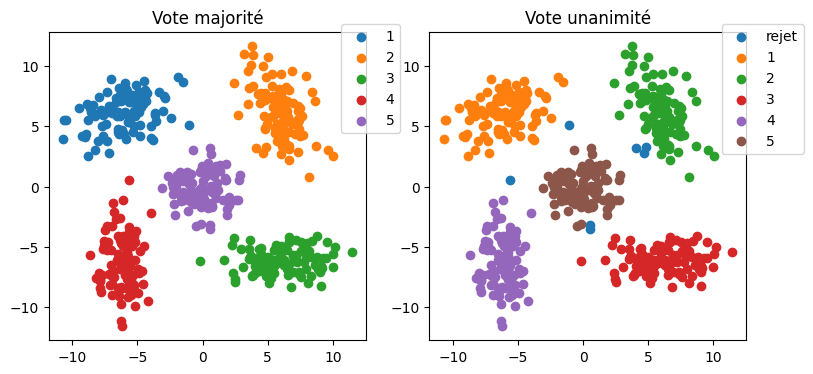

In [509]:
majorite.train(data1)
unanimite.train(data1)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
ax1.set_title('Vote majorité')
ax2.set_title('Vote unanimité')
majorite.visualisation(test1,ax1)
unanimite.visualisation(test1,ax2)

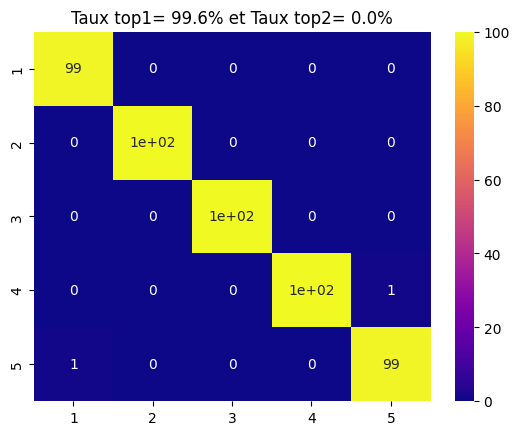

(98.4, 0.0, <Axes: title={'center': 'Taux top1= 98.4% et Taux top2= 0.0%'}>)

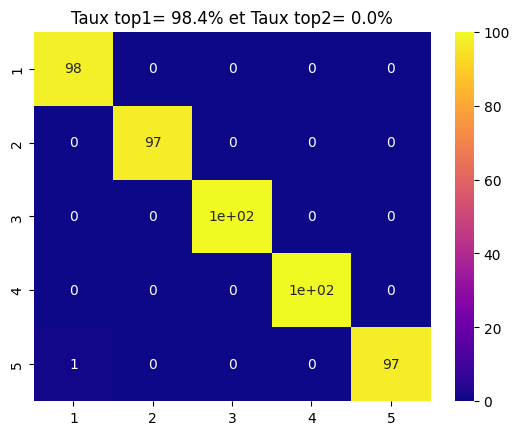

In [510]:
majorite.calcul_matrice(test1)
plt.show()
unanimite.calcul_matrice(test1)

# Dataset 2

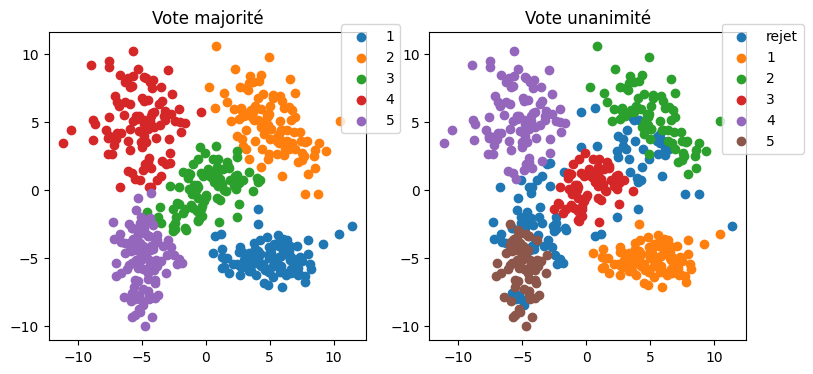

In [511]:
majorite.train(data2)
unanimite.train(data2)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
ax1.set_title('Vote majorité')
ax2.set_title('Vote unanimité')
majorite.visualisation(test2,ax1)
unanimite.visualisation(test2,ax2)

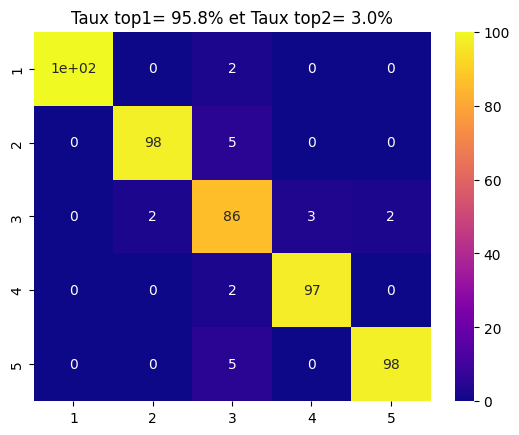

(79.4, 0.0, <Axes: title={'center': 'Taux top1= 79.4% et Taux top2= 0.0%'}>)

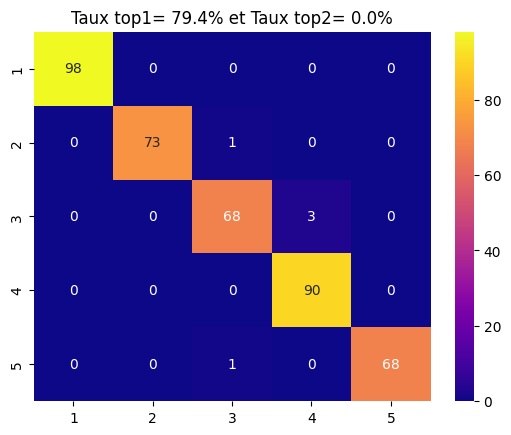

In [512]:
majorite.calcul_matrice(test2)
plt.show()
unanimite.calcul_matrice(test2)

# Dataset 3

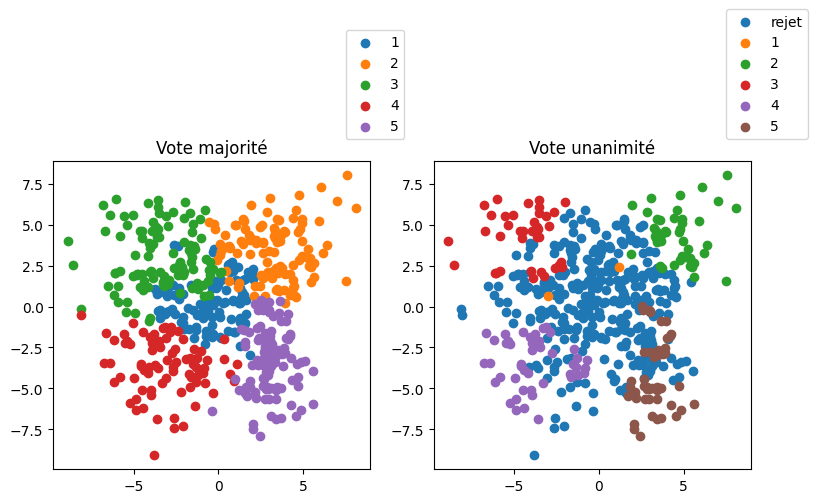

In [513]:
majorite.train(data3)
unanimite.train(data3)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
ax1.set_title('Vote majorité')
ax2.set_title('Vote unanimité')
majorite.visualisation(test3,ax1)
unanimite.visualisation(test3,ax2)

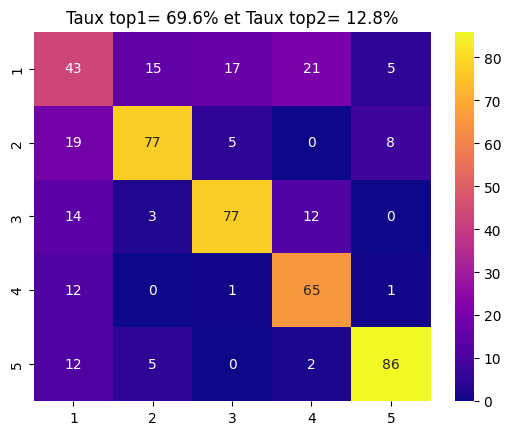

(31.4, 0.0, <Axes: title={'center': 'Taux top1= 31.4% et Taux top2= 0.0%'}>)

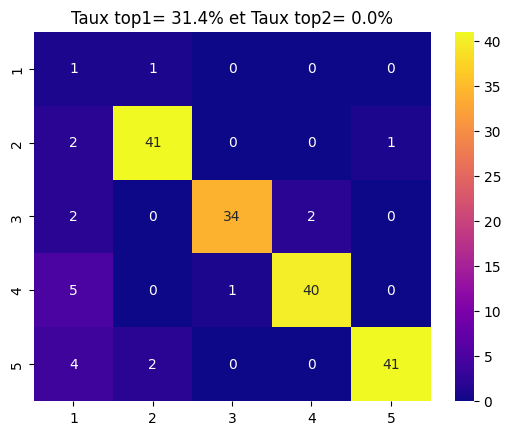

In [514]:
majorite.calcul_matrice(test3)
plt.show()
unanimite.calcul_matrice(test3)

### ***Sur les trois datasets le classifieur 5-PPV avec vote à la **majorité** donne toujours de meilleurs performances que celui avec vote à l'unanimité . Ce qui tout a fais cohérent parce que avec 5 voisin on ne peut avoir une vote à l'unanimité. Le vote à l'unanimité donne aussi de rejets sur sur le dataset3 où les classe s'imbriquent*** 

## cross_validation_5cv(data1)

### dataset1 

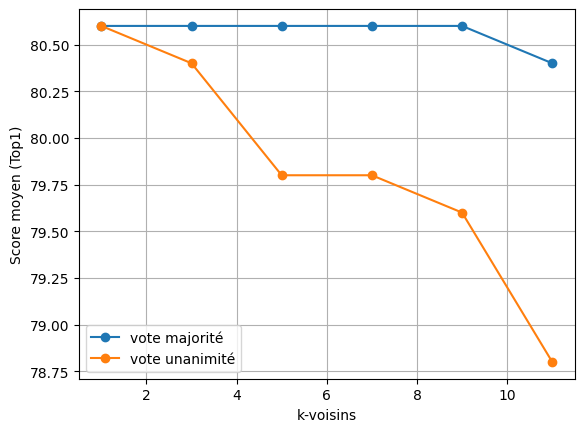

In [515]:
cross_validation_5cv(data1)

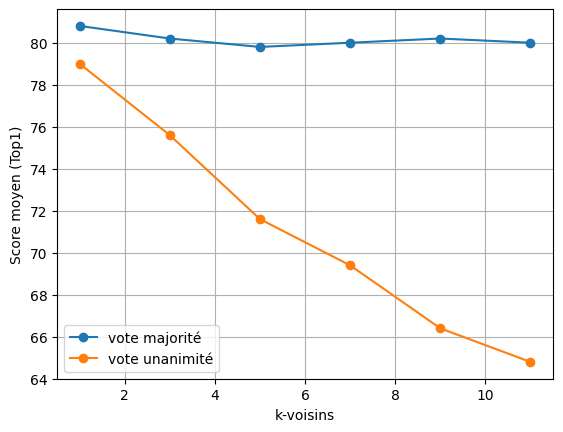

In [516]:
cross_validation_5cv(data2)

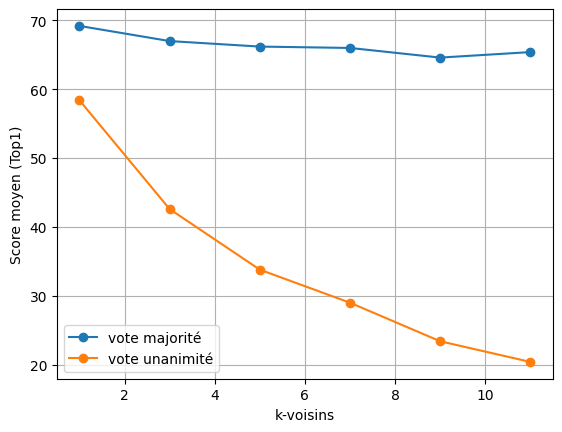

In [517]:
cross_validation_5cv(data3)

### ***Les resultats de la cross-validation montre que pour le vote à l'unanimité plus la valeur de k augmente plus le score dimunie sur tous les 3 datasets. Sur le **dataset1** tous nos valeurs de k ont le meme score pour le vote à la majorité alors que pour le vote à l'unanimité le meilleur score est donné par k=1. Pour le **dataset2** avec vote à la majorité le meilleur score est donnée par ***k=3*** et pour vote à l'unamité le meilleur score correspond k=1. Pour le **dataset3** avec vote à la majorité le meilleur score est donnée par ***k=1*** et pour vote à l'unamité le meilleur score correspond k=1.***

# Parzen pour données TP1

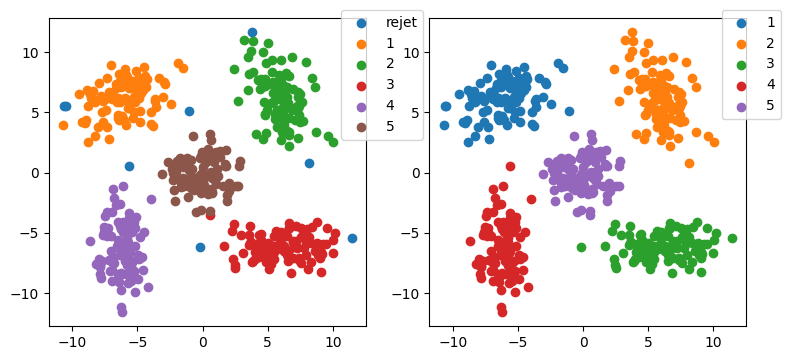

In [518]:
uniforme=Parzen(noyau="uniforme")
guassien=Parzen()
uniforme.train(data1)
guassien.train(data1)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
uniforme.visualisation(test1,ax1)
guassien.visualisation(test1,ax2)

## ***Le rejet represente les données que le classifieur n'a pas pu classer***

(98.0, 0.4, <Axes: title={'center': 'Taux top1= 98.0% et Taux top2= 0.4%'}>)

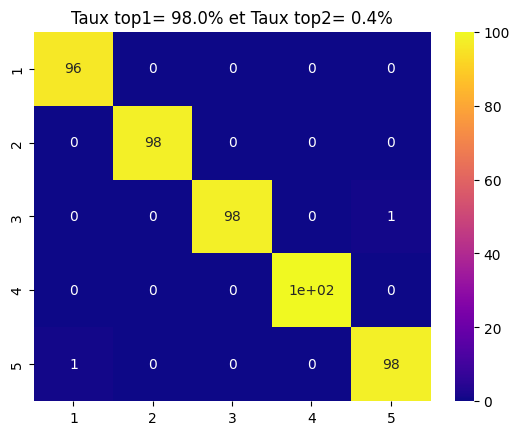

In [519]:
uniforme.calcul_matrice(test1)

(99.6, 0.2, <Axes: title={'center': 'Taux top1= 99.6% et Taux top2= 0.2%'}>)

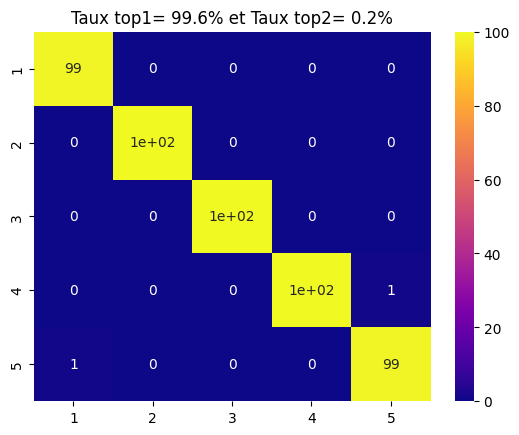

In [520]:
guassien.calcul_matrice(test1)

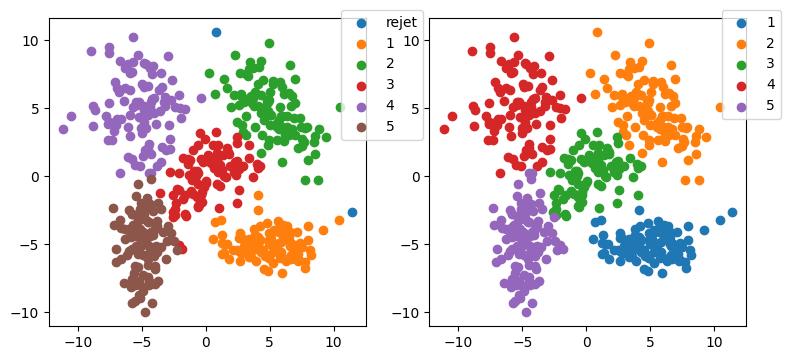

In [521]:
uniforme=Parzen(noyau="uniforme")
guassien=Parzen()
uniforme.train(data2)
guassien.train(data2)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
uniforme.visualisation(test2,ax1)
guassien.visualisation(test2,ax2)

(95.0, 3.8, <Axes: title={'center': 'Taux top1= 95.0% et Taux top2= 3.8%'}>)

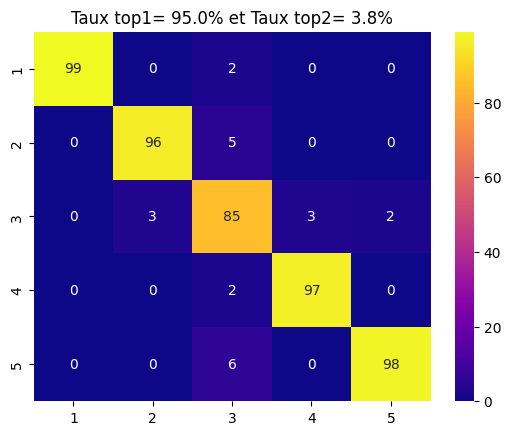

In [522]:
uniforme.calcul_matrice(test2)

(94.8, 4.6, <Axes: title={'center': 'Taux top1= 94.8% et Taux top2= 4.6%'}>)

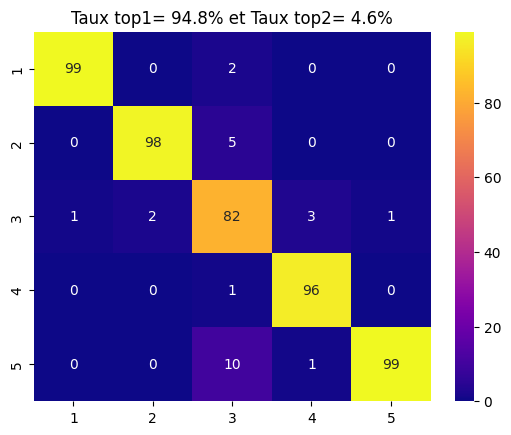

In [523]:
guassien.calcul_matrice(test2)

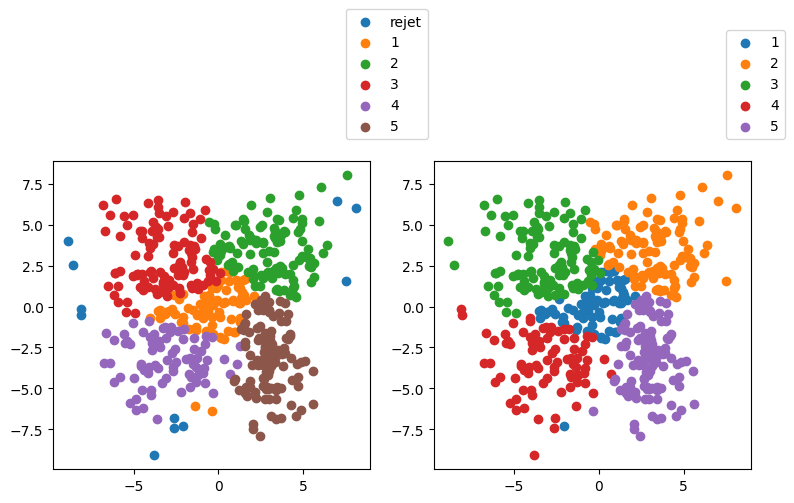

In [524]:
uniforme=Parzen(noyau="uniforme")
guassien=Parzen()
uniforme.train(data3)
guassien.train(data3)
fig=plt.figure(2,figsize=(9,4))
ax1, ax2= fig.subplots(1, 2)
uniforme.visualisation(test3,ax1)
guassien.visualisation(test3,ax2)

(69.19999999999999,
 15.6,
 <Axes: title={'center': 'Taux top1= 69.19999999999999% et Taux top2= 15.6%'}>)

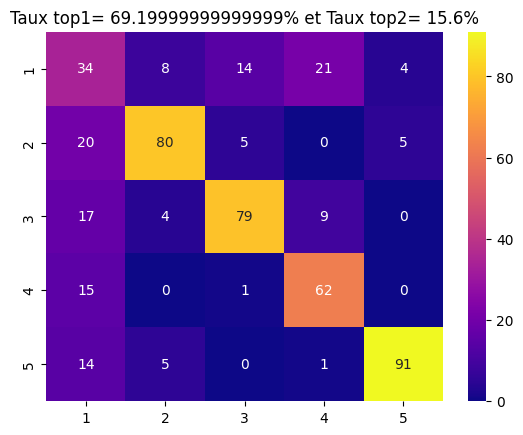

In [525]:
uniforme.calcul_matrice(test3)

(71.2, 15.2, <Axes: title={'center': 'Taux top1= 71.2% et Taux top2= 15.2%'}>)

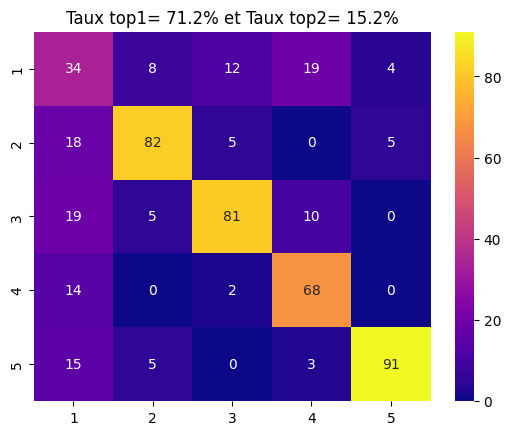

In [526]:
guassien.calcul_matrice(test3)

### ***Sur le ***dataset1*** et le ***dataset3*** le noyau **guassien** donne de ***meilleur score(Top1)*** que le noyau **unforme** mais sur le dataset2 le noyau uniforme est sensiblement plus performant.***
### ***Le noyau **uniforme** donne parfois des ***rejets(points non classés)*** alors que le noyau **gaussien** classe tous les points***

# Cross-Validation Parzen noyau uniform

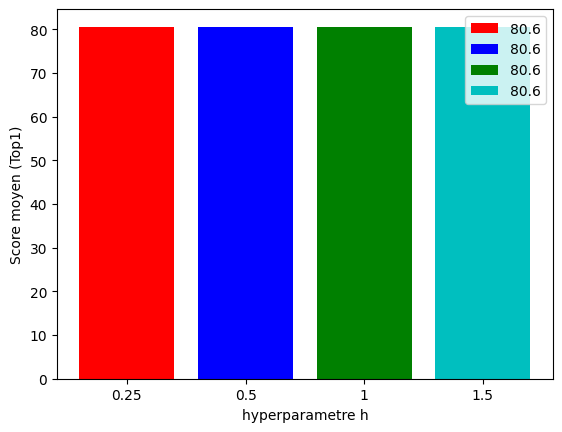

In [527]:
cross_validation_5cv(data1,'parzen')

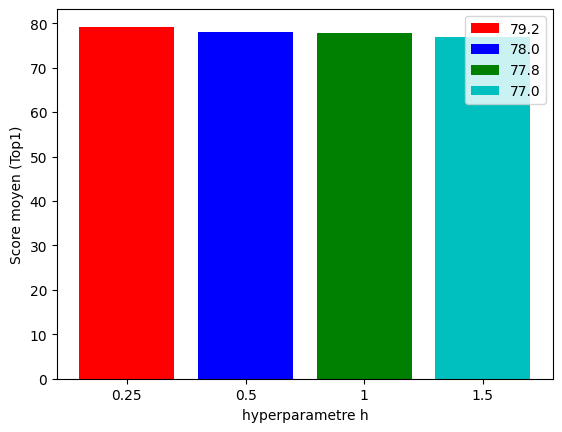

In [528]:
cross_validation_5cv(data2,'parzen')

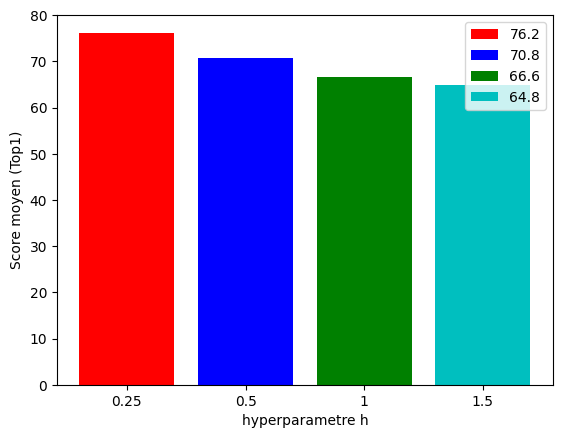

In [529]:
cross_validation_5cv(data3,'parzen')

### ***Sur le dataset1 tous nos valeurs de h(taille fenetre ) ont le meme score. Sur le dataset2 et le dataset3 le meilleur score correspond à h=0.25***

# La classe  Separateur_Lineaire pour la separation lineaire

In [530]:
class Separateur_Lineaire:
    def __init__(self,strategie='one_vs_one',classe_central=0):
        """le constructeur de la classer

        Args:
            strategie (str, optional): C'est les strategies(one_vs_one ou one_vs_all) à suivre pour trouver les hyperplans.
            classe_central (int, optional): C'est la classe centrale à supprimer si c'est une strategie one_vs_all. 
            Si la strategie est one_vs_one la valeur est 0
        """
        self.vecteur_normal=[]
        self.strategie=strategie
        self.classe_central=classe_central 
    def visualisation(self,test):
        """Methode pour visualiser les prediction appele une des methodes de visualisation en dessous

        Args:
            test (DataFrame): données de test
            classe_central (int, oself.classe_centralptional): 
        """
        if self.strategie=='one_vs_one':
            self.visualisation_one_vs_one(test)
        else:

            self.visualisation_one_vs_all(test)
        plt.show()


    def visualisation_one_vs_one(self,test):
        """Dans cette méthode j'utilise pas plot_decision_multiple() mais j'affiche le resultat 
        de la prediction sur les données de test en traçant aussi les hyperplans

        Args:
            test (DataFrame): données de test
        """
        plt.figure(figsize=(8,6))
        test=test[['x1','x2']]
        y_pred=[self.predict(i) for i in test.values.tolist()]
        test['y_predi']=y_pred
        s=test.copy()
        k=1
        for i in range(0,10):
                    x1=np.linspace(s['x1'].min(),s['x1'].max(),10) #je genere 5 valeurs x1 
                    x2=-(self.vecteur_normal[i][0][0]*x1+self.vecteur_normal[i][0][2])/self.vecteur_normal[i][0][1]  #je calcule x2 en fonction de l'hyperplan

                    if max(x2)<=s['x2'].max() and min(x2)>=s['x2'].min(): #je verifie si les x2 sont sur la plage des données
                        plt.plot(x1,x2,label=f'{self.vecteur_normal[i][1][0]} vs {self.vecteur_normal[i][1][1]}')
                       
                        
                    else: #si les x2 ne sont pas sur la page (valeur grande) ,je genere x2 et projete sur x1 par rapport à l'hyperplan

                        x2=np.linspace(s['x2'].min(),s['x2'].max(),10)
                        x1=-(self.vecteur_normal[i][0][1]*x2+self.vecteur_normal[i][0][2])/self.vecteur_normal[i][0][0]
                        plt.plot(x1,x2,label=f'{self.vecteur_normal[i][1][0]} vs {self.vecteur_normal[i][1][1]}')
                        
        for label in range(1,6):
                plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
        plt.legend()


    def visualisation_one_vs_all(self,test):
        """Dans cette méthode j'utilise pas plot_decision_multiple() mais j'affiche le resultat 
        de la prediction sur les données de test en traçant aussi les hyperplans

        Args:
            test (DataFrame): données de test
        """
        plt.figure(figsize=(8,6))
        test=test[test['y']!=self.classe_central].copy() #je supprime la classe centrale
        test=test[['x1','x2']]
        y_pred=[self.predict(i) for i in test.values.tolist()] #je créer une colone y_pred pour y stocker les resultats de prediction
        test['y_predi']=y_pred
        s=test.copy()
        k=1
        for i in range(0,5):
                if k!=self.classe_central and i<=4: 

                    x1=np.linspace(s['x1'].min(),s['x1'].max(),5) #je genere 5 valeurs x1 
                    x2=-(self.vecteur_normal[i][0]*x1+self.vecteur_normal[i][2])/self.vecteur_normal[i][1]  #je calcule x2 en fonction de l'hyperplan

                    if max(x2)<=s['x2'].max() and min(x2)>=s['x2'].min(): #je verifie si les x2 sont sur la plage des données
                        plt.plot(x1,x2,label=f'hyperplan {k}')
                        plt.text(x1[i],x2[i],f'hyperplan de la classe {k}')
                        
                    else: #si les x2 ne sont pas sur la page (valeur grande) ,je genere x2 et projete sur x1 par rapport à l'hyperplan

                        x2=np.linspace(s['x2'].min(),s['x2'].max(),5)
                        x1=-(self.vecteur_normal[i][1]*x2+self.vecteur_normal[i][2])/self.vecteur_normal[i][0]
                        plt.plot(x1,x2,label=f'hyperplan {k}')
                        plt.text(x1[i],x2[i],f'hyperplan de la classe {k}')
                        
                k+=1
                    
        for label in range(1,6):
            if label != self.classe_central:
                plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
        plt.legend()
        
    def plot_decision_multi(self,x1_min, x1_max, x2_min, x2_max,sample = 300):

        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.predict([x1,x2]) for x1 in x1_list] for x2 in x2_list]
        l = np.shape(np.unique(y_grid_pred))[0] - 1
        plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)
        
    def train_one_vs_one(self,data,max_iter):
        for i in data['y'].unique():
                for j in data['y'].unique():
                    if i<j:
                        s=data.copy()
                        s=s[(s['y']==i) | (s['y']==j)]
                        s['plus']=np.ones(len(s)) 
                        # Je transforme les données en dimension d+1(ici 3) et multiplier par -1 les données de la classe j
                        s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == j else row[['x1','x2','plus']], axis=1)
                        s=s[['x1','x2','plus']]
                        s=np.array(s)
                        a=np.ones(s.shape[1]) #l'hyperplan
                        compt=1
                        nb_iter=0
                        while compt!=0 and nb_iter<max_iter:
                            compt=0
                            for k in s:
                                if a@k<0:
                                    compt=1
                                    a=a+k
                            nb_iter+=1
                        self.vecteur_normal.append([a,(i,j)]) #je stocke l'hyperplan et les classes qu'il separe (i et j)
                    
    def train_one_vs_all(self,data,max_iter):
        
        data_=data[data['y']!=self.classe_central].copy()
        for i in data['y'].unique():
            s=data_.copy()
            s['plus']=np.ones(len(s))
            s['y']=s.apply(lambda row: 0 if row['y'] != i else row['y'], axis=1) #Les données des autres classes vont etre etiquetés comme clase 0
            # Je transforme les données en dimension d+1(ici 3) et multiplier par -1 les données de la classe 0
            s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == 0 else row[['x1','x2','plus']], axis=1)
            s=s[['x1','x2','plus']]
            s=np.array(s)
            a=np.ones(s.shape[1])
            compt=1 # Pour tester si tous les points sont bien classés
            nb_iter=0
            while compt!=0 and nb_iter<max_iter: #On sort de la boucle si tous les points sont bien classés ou si on atteint le max_iter
                compt=0
                for k in s:
                   if a@k<0:
                     compt=1 # Des qu'in rencontre un point mal classé on met comp=1
                     a=a+k
                nb_iter+=1
            self.vecteur_normal.append(a)
                    
    def train(self,data,max_iter=1000):
        """la methode train appelle l'une des methode en haut en fonction de la valeur de strategie

        Args:
            data (DataFrame): Données d'entrainements
            max_iter (int, optional): nombre d'iteration (epoque) maximale. Par defaut 1000
        """
        self.vecteur_normal=[]
        if self.strategie=="one_vs_one":
            self.train_one_vs_one(data,max_iter)
        else:
            self.train_one_vs_all(data,max_iter)
            
    def compt_occur(self,l):
        maxe=0
        res=0
        for i in l:
            compt=0
            for j in l:
                if i==j:
                    compt+=1
            if compt>maxe:
                maxe=compt
                res=i
        return res  
        
    def predict(self,x):
        """methode pour predire la classe de x

        Args:
            x (list): l'element qu'on doit predire la classe

        Returns:
            int: la classe predit
        """
        x.append(1)
        classe=[]     
        if self.strategie=="one_vs_one":
            for i in self.vecteur_normal:
                if i[0]@x>0:
                    classe.append(i[1][0])
                else:
                    classe.append(i[1][1])
        else:
          for i in range(len(self.vecteur_normal)):
              if self.vecteur_normal[i]@x>0:
                 classe.append(i+1)
        return self.compt_occur(classe)
    
    def calcul_matrice(self,test,seul_top1=False):
        """Calcul le score top1 et la matrice de confusion

        Args:
            test (matrice): donner à predire
            seul_top1 (bool, optional): Si on veut seulement retourner le score sans la metrice de confusion.  Par defaut False.

        Returns:
            _type_: _description_
        """
        columns = ['1', '2', '3', '4', '5']
        index = ['1', '2', '3', '4', '5']
        if self.strategie!="one_vs_one":
            test=test[test['y']!=5]
            columns = ['1', '2', '3', '4']
            index = ['1', '2', '3', '4']
        y=list(test['y'])
        top1=[self.predict(k) for k in test[['x1','x2']].values.tolist()]
        matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,len(test['y'].unique())+1)] for i in range(1,len(test['y'].unique())+1)]
        taux_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)*100
        df = pd.DataFrame(matrice, columns=columns,index = index)
        if seul_top1==True:
            return taux_top1
        plt.title(f'Taux top1= {taux_top1}%')
        return taux_top1,sns.heatmap(df,annot = True, cbar = True, cmap = 'plasma')
        

## Stratégie One vs One

In [531]:
sep=Separateur_Lineaire()

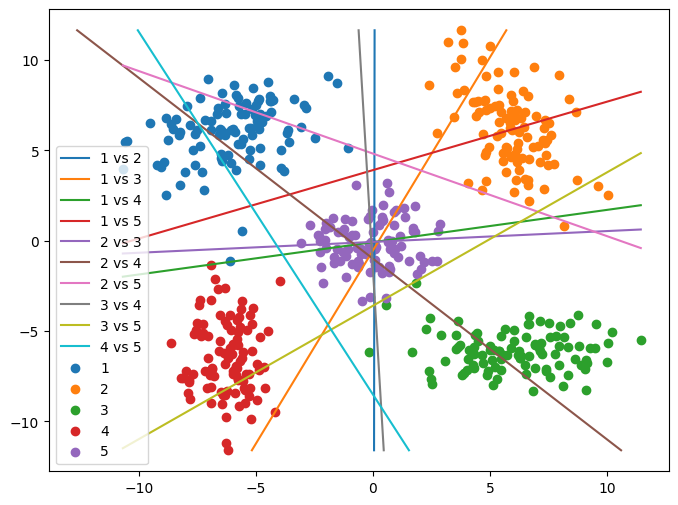

(99.0, <Axes: title={'center': 'Taux top1= 99.0%'}>)

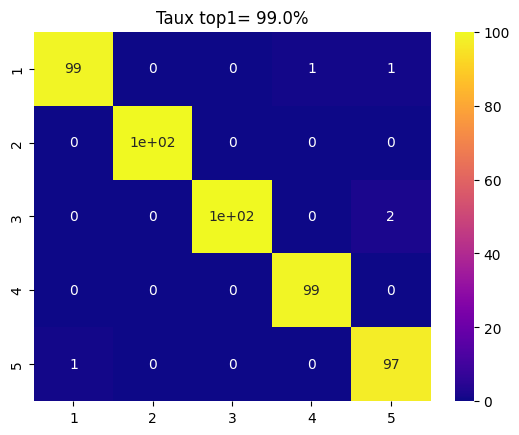

In [532]:
sep.train(data1)
sep.visualisation(test1)
sep.calcul_matrice(test1)

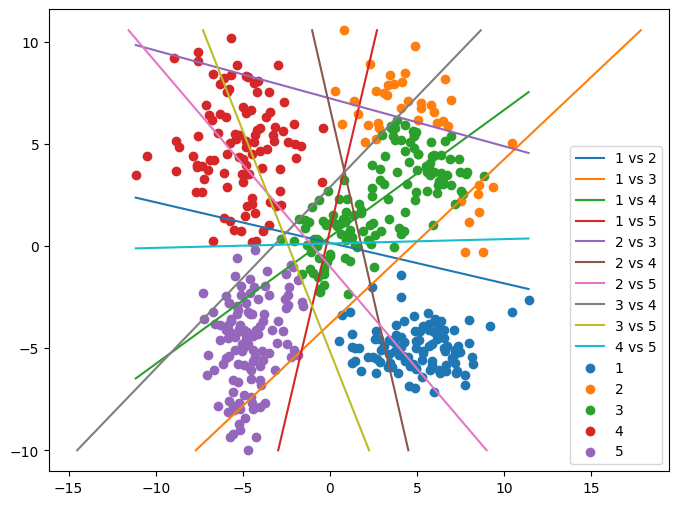

(82.8, <Axes: title={'center': 'Taux top1= 82.8%'}>)

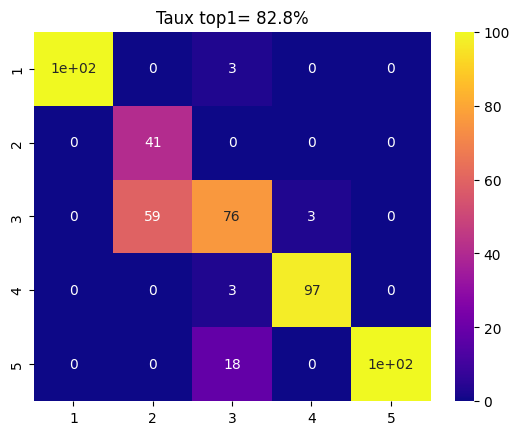

In [533]:
sep.train(data2)
sep.visualisation(test2)
sep.calcul_matrice(test2)

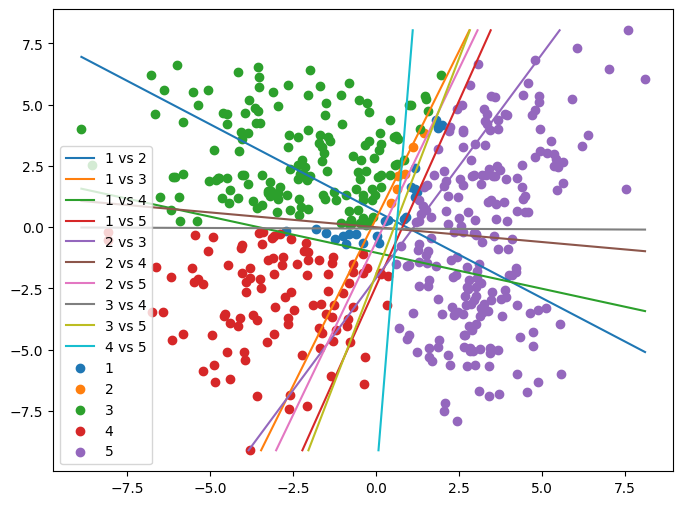

(56.8, <Axes: title={'center': 'Taux top1= 56.8%'}>)

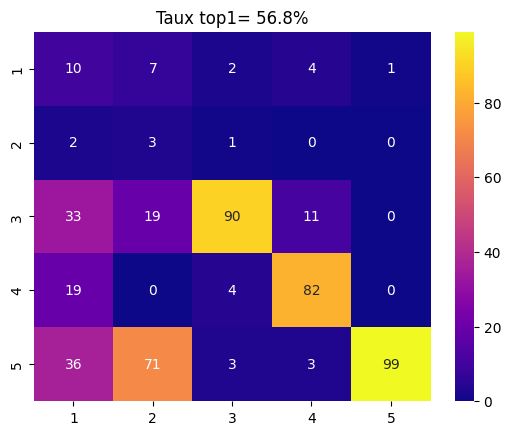

In [534]:
sep.train(data3)
sep.visualisation(test3)
sep.calcul_matrice(test3)

### ***Le classifieur avec stratégie ***one_vs_one*** donne de **meilleur performance sur le dataset1** parceque les classes sont ***linéairement separable*** sur ce dataset alors que sur le **dataset2** et le **dataset3** les classes ne sont pas linéairement separables***

# Strategie one_vs_all

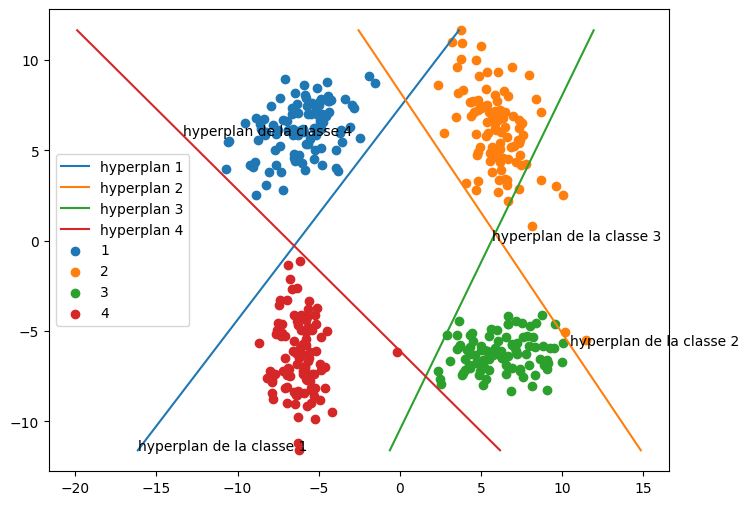

(97.75, <Axes: title={'center': 'Taux top1= 97.75%'}>)

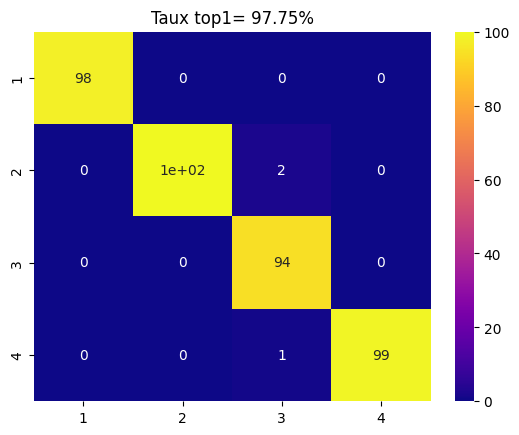

In [535]:
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=5)
sep.train(data1)
sep.visualisation(test1)
sep.calcul_matrice(test1)

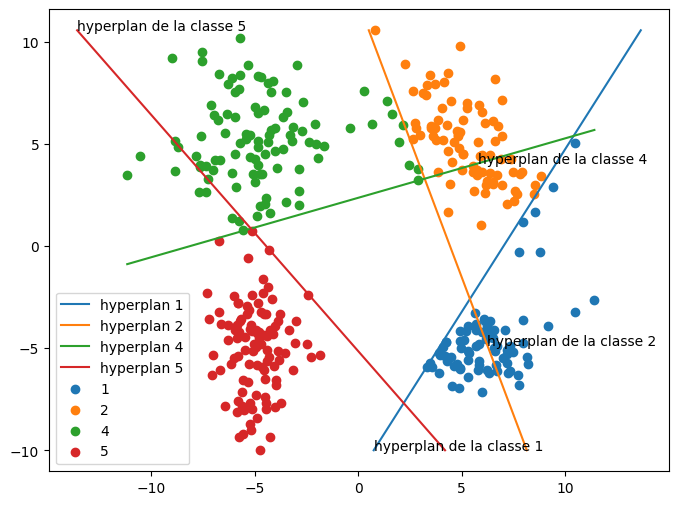

(61.25000000000001, <Axes: title={'center': 'Taux top1= 61.25000000000001%'}>)

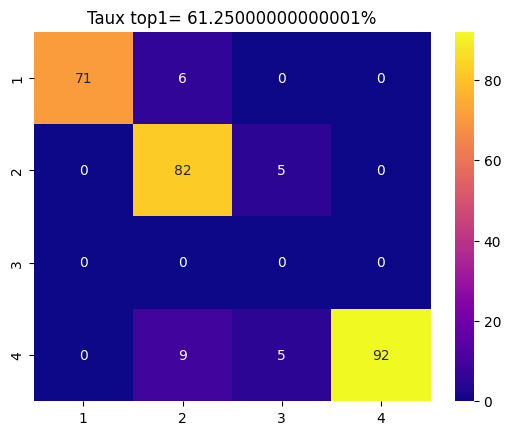

In [536]:
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=3)
sep.train(data2)
sep.visualisation(test2)
sep.calcul_matrice(test2)

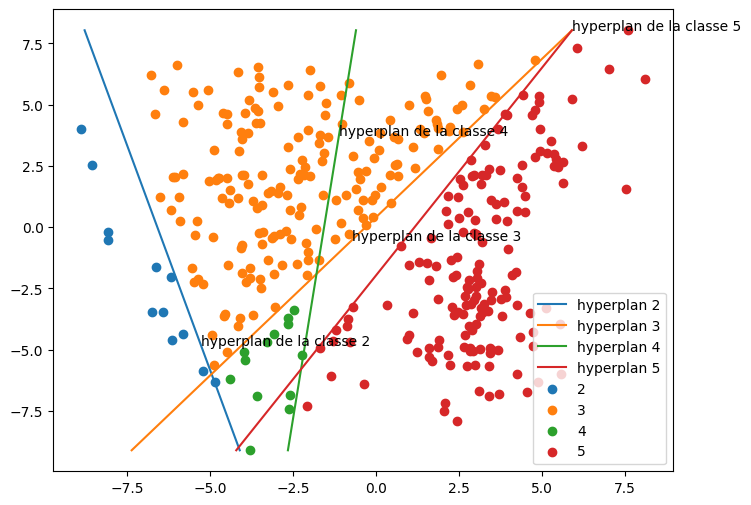

(26.75, <Axes: title={'center': 'Taux top1= 26.75%'}>)

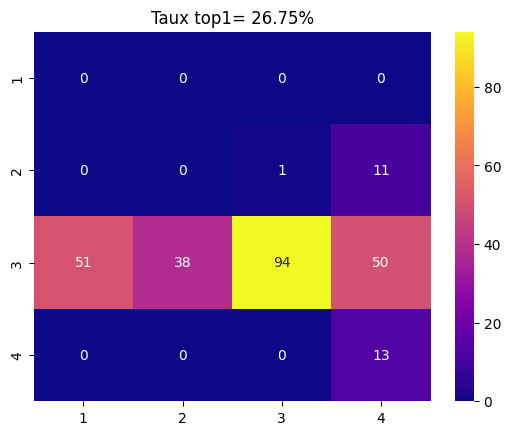

In [537]:
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=1)
sep.train(data3)
sep.visualisation(test3)
sep.calcul_matrice(test3)

## Comparaison One vs One et One vs All

In [538]:

sep=Separateur_Lineaire()
sep.train(data1)
d1=sep.calcul_matrice(test1,seul_top1=True)
sep.train(data2)
d2=sep.calcul_matrice(test2,seul_top1=True)
sep.train(data3)
d3=sep.calcul_matrice(test3,seul_top1=True)
one_v_one=[d1,d2,d3]

In [539]:
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=5)
sep.train(data1)
d1=sep.calcul_matrice(test1,seul_top1=True)
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=3)
sep.train(data2)
d2=sep.calcul_matrice(test2,seul_top1=True)
sep=Separateur_Lineaire(strategie='one_vs_all',classe_central=1)
sep.train(data3)
d3=sep.calcul_matrice(test3,seul_top1=True)
one_v_all=[d1,d2,d3]

<Axes: title={'center': 'Comparaison One vs One et One vs All'}, ylabel='Score Top1 en %'>

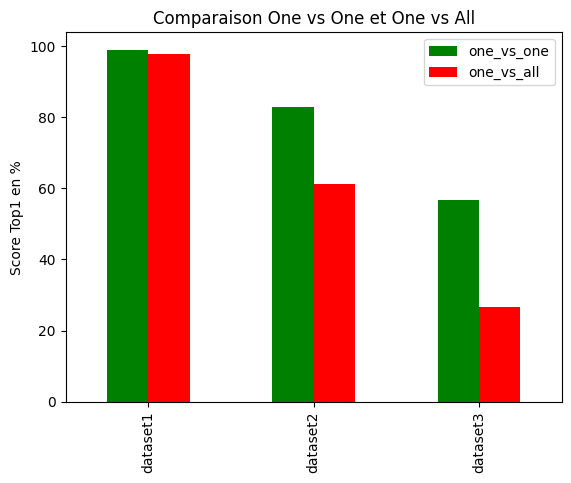

In [540]:
df = pd.DataFrame({'one_vs_one': one_v_one, 'one_vs_all': one_v_all},
  index = ['dataset1', 'dataset2', 'dataset3'])   
df.plot(kind = 'bar',color = {'one_vs_one': 'green','one_vs_all': 'red'},ylabel='Score Top1 en %',title='Comparaison One vs One et One vs All')

### ***Sur les trois dataset la stratégie one vs one et meilleur que one vs all***

# Partie Arbre de decision

In [587]:
def arbre_decision(data,label,class_names):
    t=tree.DecisionTreeClassifier()
    t.fit(data.data,label)
    tree.export_graphviz(t, out_file="tree.dot",class_names=class_names, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    g = graphviz.Source(dot_graph)
    g.render()
    g.view()

In [588]:
iris = datasets.load_iris()
y = iris.target
arbre_decision(iris,y,['setosa','versicolor','virginica'])

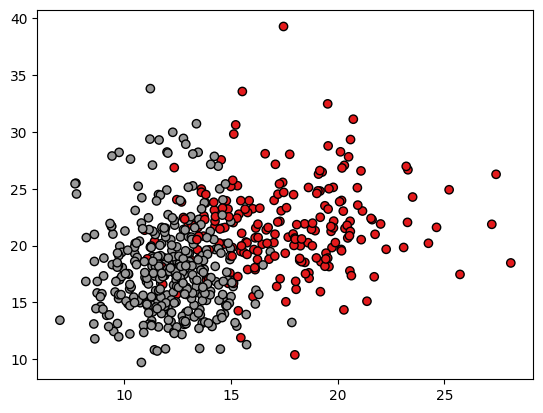

In [543]:
cancer=datasets.load_breast_cancer()
cancer_target=cancer.target
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer_target, cmap=plt.cm.Set1,edgecolor='k')

In [544]:
arbre_decision(cancer,cancer_target,['malignant', 'benign'])

# Comparaison de classifieurs

In [545]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, stratify=y, random_state=42)

In [546]:
t=tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.8947368421052632

In [547]:
t=GaussianNB()
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.9210526315789473

In [548]:
t=KNeighborsClassifier()
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.9736842105263158

# Cros-Validation

In [549]:
def my_cros_validation(model,data,target):
    t=model
    scores = cross_val_score(t, data, target, cv=5)
    print(f'Accurency : {scores.mean()} (+/- {scores.std()})')

### Pour iris

In [550]:
my_cros_validation(tree.DecisionTreeClassifier(),iris.data,y)

Accurency : 0.9600000000000002 (+/- 0.03265986323710903)


In [551]:
my_cros_validation(GaussianNB(),iris.data,y)

Accurency : 0.9533333333333334 (+/- 0.02666666666666666)


In [552]:
my_cros_validation(KNeighborsClassifier(),iris.data,y)

Accurency : 0.9733333333333334 (+/- 0.02494438257849294)


# Sur brest cancer

In [553]:
my_cros_validation(tree.DecisionTreeClassifier(),cancer.data,cancer_target)

Accurency : 0.9261450085390468 (+/- 0.02277790839738558)


In [554]:

my_cros_validation(GaussianNB(),cancer.data,cancer_target)

Accurency : 0.9385188635305075 (+/- 0.014585994424363306)


In [555]:
my_cros_validation(KNeighborsClassifier(),cancer.data,cancer_target)

Accurency : 0.9279459711224964 (+/- 0.02176276406544814)


## Sur Wine

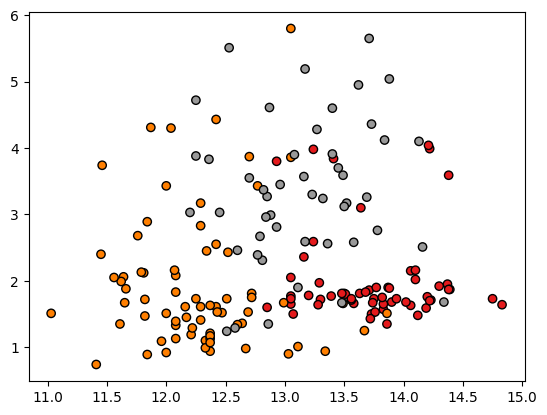

In [556]:
wine=datasets.load_wine()
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target, cmap=plt.cm.Set1,edgecolor='k')

In [557]:
my_cros_validation(tree.DecisionTreeClassifier(),wine.data,wine.target)

Accurency : 0.8653968253968254 (+/- 0.06157134468458992)


In [558]:
my_cros_validation(GaussianNB(),wine.data,wine.target)

Accurency : 0.9663492063492063 (+/- 0.02113317858457236)


In [559]:
my_cros_validation(KNeighborsClassifier(),wine.data,wine.target)

Accurency : 0.6912698412698413 (+/- 0.04877951071049148)


#### ***Sur le dataset iris KNeighborsClassifier est plus performant suivi de GaussianNB***
#### ***Sur le dataset brest cancer GaussianNB est plus performant suivi de KNeighborsClassifier***
#### ***Sur le dataset wine GaussianNB est plus performant suivi de DecisionTreeClassifier***

## Générer une base de données synthétique en deux dimensions avec la fonction make_moon de Scikit-learn11. Cette base sera composée de 2 classes, 500 instances, et un taux de bruit de 0.2.

In [560]:
x,y=datasets.make_moons(500,noise=0.2)

### Lancez l’apprentissage d’un arbre de décision, d’un GaussianNB et d’un KNeighborsClassifiersur cette base, comme à l’exercice précédent.

In [561]:
my_cros_validation(GaussianNB(),x,y)

Accurency : 0.8640000000000001 (+/- 0.013564659966250548)


In [562]:
my_cros_validation(KNeighborsClassifier(),x,y)

Accurency : 0.9640000000000001 (+/- 0.01019803902718558)


## Créez une fonction python plot_decision_frontiers

In [563]:
def plot_decision_frontiers(classifier,data,label,fig,sample=300):
    """visualisation des frontiere de decision

    Args:
        classifier (objet): le classifieur
        data (matrice): donnees d'entrainement du classifieur
        fig (figure): 
        label (array): les classes
        sample (int, optional): le nombre points a générer. Defaults to 300.
    """
    x1_min, x1_max = data[:, 0].min(), data[:, 0].max()
    x2_min, x2_max = data[:, 1].min(), data[:, 1].max()
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    x1_grid, x2_grid = np.meshgrid(x1_list, x2_list)
    grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    y_pred = np.array([classifier.predict(i.reshape(1, -1)) for i in grid])
    y=y_pred.copy()
    y_pred = y_pred.reshape(x1_grid.shape)
    fig.scatter(data[:, 0], data[:, 1], c=label)
    fig.legend()
    level = np.shape(np.unique(y_pred))[0] - 1 
    fig.contourf(x1_grid, x2_grid, y_pred, levels=level, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)
    

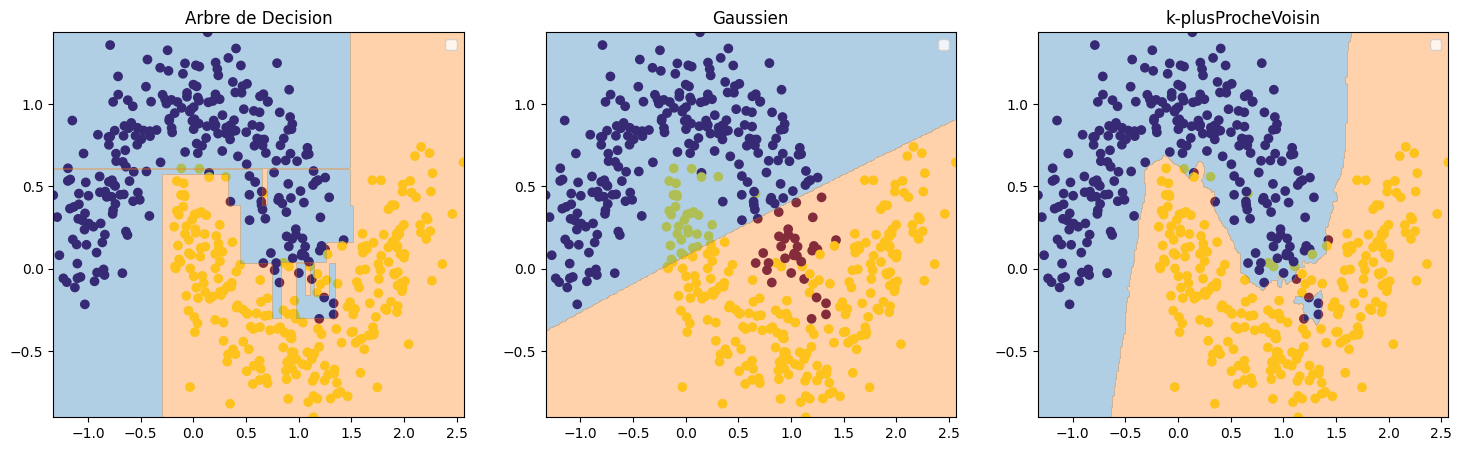

In [564]:
arbre=tree.DecisionTreeClassifier()
arbre.fit(x,y)
guassien=GaussianNB()
guassien.fit(x,y)
knn=KNeighborsClassifier()
knn.fit(x,y)
fig=plt.figure(3, figsize=(18, 5))
ax1, ax2,ax3 = fig.subplots(1, 3)
ax1.set_title('Arbre de Decision')
ax2.set_title('Gaussien')
ax3.set_title('k-plusProcheVoisin')
plot_decision_frontiers(arbre,x,y,ax1)
plot_decision_frontiers(guassien,x,y,ax2)
plot_decision_frontiers(knn,x,y,ax3)

## 5 Étude de paramètres

### Générez une nouvelle base avec make_moon, avec 1000 données et un taux de bruits de 0.3.

In [565]:
x,y=datasets.make_moons(1000,noise=0.3)

### Lancez l’apprentissage de deux arbres de décision sur cette base: l’un avec le critère de partitionnement Gini, l’autre avec Entropy.

In [566]:
cfc=tree.DecisionTreeClassifier(criterion='gini')
cfc.fit(x,y)
cfc.score(x,y)

1.0

In [567]:
cfc=tree.DecisionTreeClassifier(criterion='entropy')
cfc.fit(x,y)
cfc.score(x,y)

1.0

### Visualisez les frontières de décision des deux classifieurs ainsi obtenus en utilisant la fonction définie à l’exercice précédent.

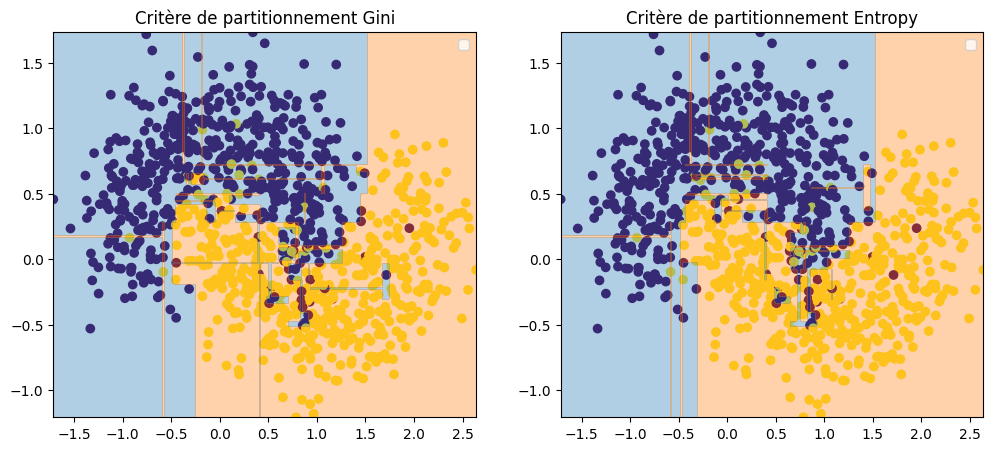

In [568]:
cfc1=tree.DecisionTreeClassifier(criterion='gini')
cfc1.fit(x,y)
cfc2=tree.DecisionTreeClassifier(criterion='entropy')
cfc2.fit(x,y)
fig=plt.figure(2, figsize=(12, 5))
ax1, ax2 = fig.subplots(1, 2)
ax1.set_title('Critère de partitionnement Gini')
ax2.set_title('Critère de partitionnement Entropy')
plot_decision_frontiers(cfc1,x,y,ax1)
plot_decision_frontiers(cfc2,x,y,ax2)


### Estimez également les performances de ces deux algorithmes d’apprentissage avec une procédure de validation croisée.

In [569]:
cfc=tree.DecisionTreeClassifier(criterion='gini')
my_cros_validation(cfc,x,y)

Accurency : 0.8779999999999999 (+/- 0.013266499161421611)


In [570]:
cfc=tree.DecisionTreeClassifier(criterion='entropy')
my_cros_validation(cfc,x,y)

Accurency : 0.876 (+/- 0.01907878402833893)


### ***Les deux algorithmes ont sensiblement le meme score sur le dataset lunaire***

## Dans un deuxième temps, vous allez créer une expérience pour visualiser l’évolution des performances en fonction des valeurs de deux paramètres:

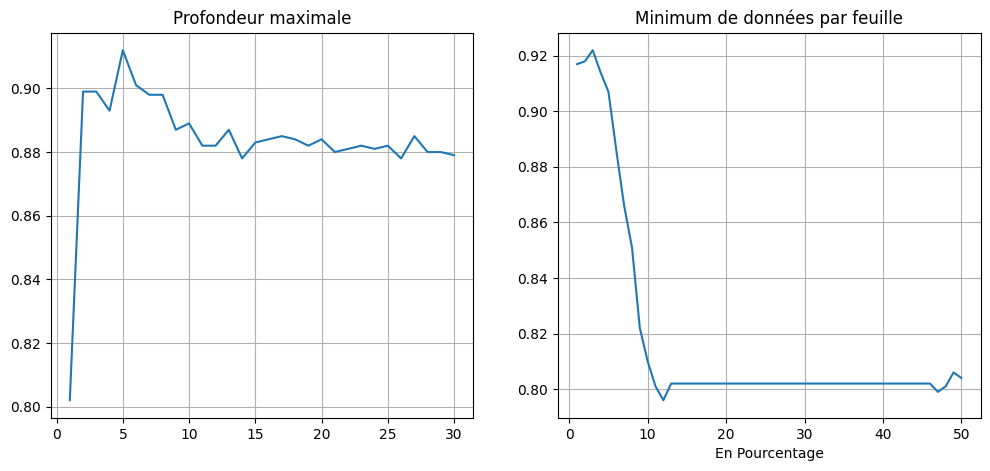

In [571]:
profondeurs=np.arange(1,31)
leaf=np.arange(1,51)
scr_prof=[]
scr_leaf=[]
fig=plt.figure(2,figsize=(12,5))
ax1,ax2=fig.subplots(1,2)
ax1.set_title('Profondeur maximale')
ax2.set_title('Minimum de données par feuille')
for prof in profondeurs:
    cfc=tree.DecisionTreeClassifier(max_depth=prof)
    s=cross_val_score(cfc,x,y).mean()
    scr_prof.append(s)
for min_sample_leaf in leaf:
    cfc=tree.DecisionTreeClassifier(min_samples_leaf=min_sample_leaf/100)
    s=cross_val_score(cfc,x,y).mean()
    scr_leaf.append(s)
ax1.plot(profondeurs,scr_prof)
ax2.plot(leaf,scr_leaf)
ax2.set_xlabel('En Pourcentage')
ax1.grid()
ax2.grid()

#### ***Plus la profondeur est grande plus le score diminue parce avec une grande profondeur de l'arbre , le model surapprend et perd sa capacité de généralisation(Sur-apprentissage). C'est le meme phenomene qui se passe aussi avec le nombre minimum de données par feuille  car si se nombre est trop grand le model sous apprend avec une faible performance sur les données d'entraînement(Sous-apprentissage)***


# Partie SVM

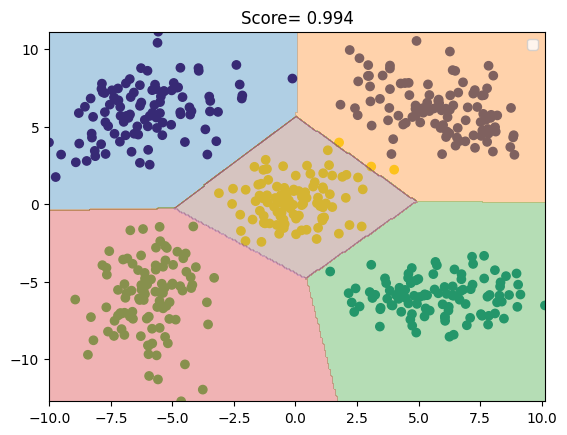

In [572]:
svm=LinearSVC()
svm.fit(data1[['x1','x2']],data1['y'])
plt.title(f'Score= {svm.score(data1[['x1','x2']],data1['y']) }')
plot_decision_frontiers(svm,np.array(data1[['x1','x2']]),data1['y'],plt)

In [573]:
svm=LinearSVC()
my_cros_validation(svm,data1[['x1','x2']],data1['y'])

Accurency : 0.992 (+/- 0.007483314773547889)


## Visualisation des resultats des differents noyaux

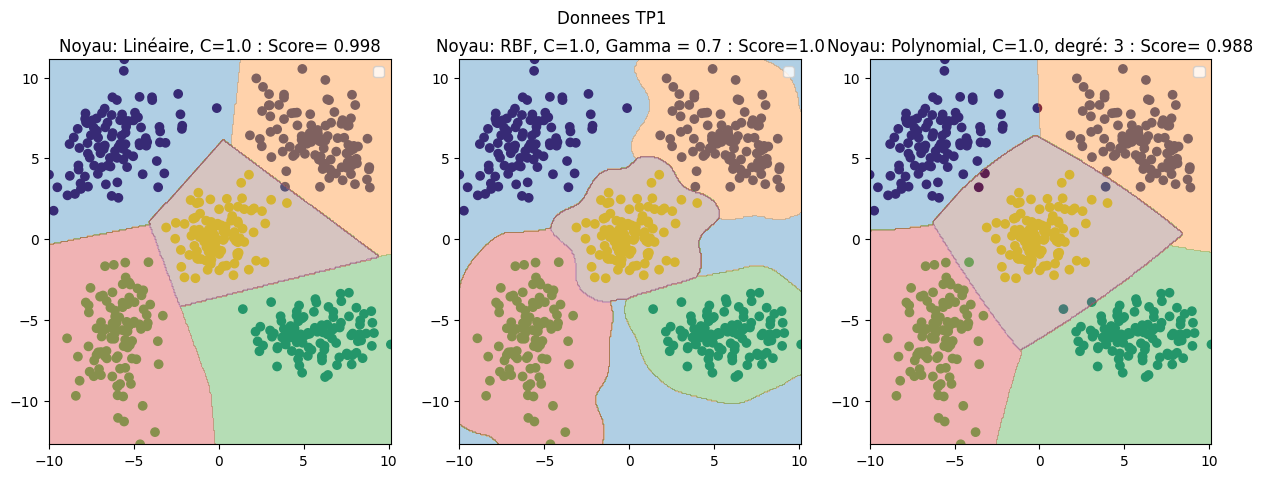

In [574]:
#Jeu de données TP1
lineaire=SVC(kernel='linear',C=1)
lineaire.fit(data1[['x1','x2']],data1['y'])

rbf=SVC(kernel='rbf' ,C=1.0,gamma=0.7)
rbf.fit(data1[['x1','x2']],data1['y'])


poly=SVC(kernel='poly' ,C=1.0,degree=3)
poly.fit(data1[['x1','x2']],data1['y'])

fig=plt.figure(3,figsize=(15,5))
ax1, ax2,ax3 = fig.subplots(1, 3)

fig.suptitle('Donnees TP1')
ax1.set_title(f'Noyau: Linéaire, C=1.0 : Score= {lineaire.score(data1[['x1','x2']],data1['y']) }')
ax2.set_title(f'Noyau: RBF, C=1.0, Gamma = 0.7 : Score={rbf.score(data1[['x1','x2']],data1['y']) }')
ax3.set_title(f'Noyau: Polynomial, C=1.0, degré: 3 : Score= {poly.score(data1[['x1','x2']],data1['y']) }')

plot_decision_frontiers(lineaire,np.array(data1[['x1','x2']]),data1['y'],ax1)
plot_decision_frontiers(rbf,np.array(data1[['x1','x2']]),data1['y'],ax2)
plot_decision_frontiers(poly,np.array(data1[['x1','x2']]),data1['y'],ax3)

In [575]:
my_cros_validation(lineaire,data1[['x1','x2']],data1['y'])

Accurency : 0.998 (+/- 0.0040000000000000036)


In [576]:
my_cros_validation(rbf,data1[['x1','x2']],data1['y'])

Accurency : 0.9960000000000001 (+/- 0.00489897948556636)


In [577]:
my_cros_validation(poly,data1[['x1','x2']],data1['y'])

Accurency : 0.9880000000000001 (+/- 0.0040000000000000036)


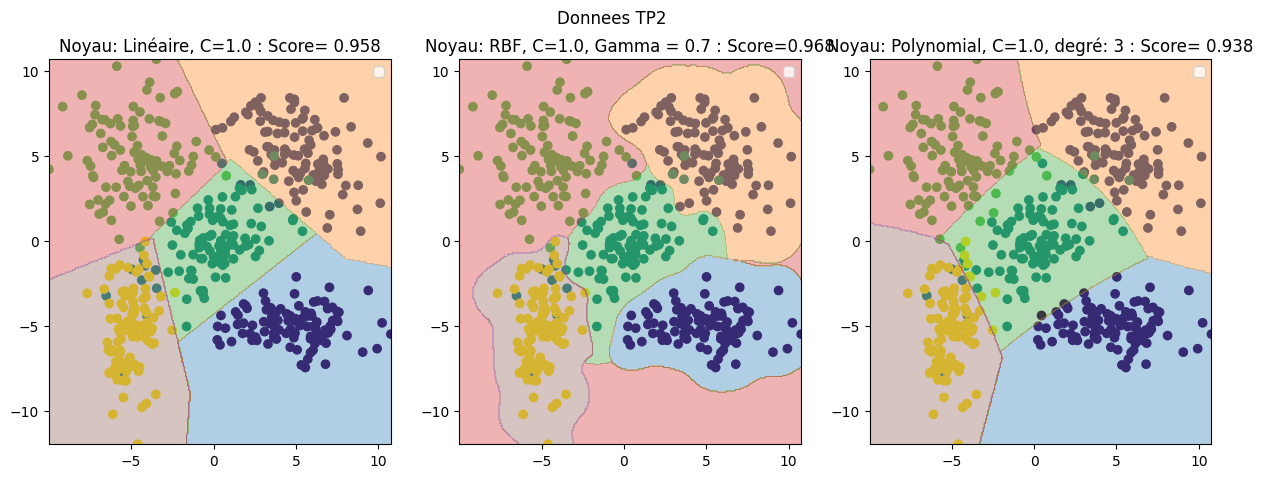

In [578]:
#Jeu de données TP2
lineaire=SVC(kernel='linear',C=1)
lineaire.fit(data2[['x1','x2']],data2['y'])

rbf=SVC(kernel='rbf' ,C=1.0,gamma=0.7)
rbf.fit(data2[['x1','x2']],data2['y'])


poly=SVC(kernel='poly' ,C=1.0,degree=3)
poly.fit(data2[['x1','x2']],data2['y'])

fig=plt.figure(3,figsize=(15,5))
ax1, ax2,ax3 = fig.subplots(1, 3)

fig.suptitle('Donnees TP2')
ax1.set_title(f'Noyau: Linéaire, C=1.0 : Score= {lineaire.score(data2[['x1','x2']],data2['y']) }')
ax2.set_title(f'Noyau: RBF, C=1.0, Gamma = 0.7 : Score={rbf.score(data2[['x1','x2']],data2['y']) }')
ax3.set_title(f'Noyau: Polynomial, C=1.0, degré: 3 : Score= {poly.score(data2[['x1','x2']],data2['y']) }')

plot_decision_frontiers(lineaire,np.array(data2[['x1','x2']]),data2['y'],ax1)
plot_decision_frontiers(rbf,np.array(data2[['x1','x2']]),data2['y'],ax2)
plot_decision_frontiers(poly,np.array(data2[['x1','x2']]),data2['y'],ax3)

In [579]:

my_cros_validation(lineaire,data2[['x1','x2']],data2['y'])

Accurency : 0.944 (+/- 0.020591260281973965)


In [580]:
my_cros_validation(rbf,data2[['x1','x2']],data2['y'])

Accurency : 0.93 (+/- 0.032863353450309954)


In [581]:
my_cros_validation(poly,data2[['x1','x2']],data2['y'])

Accurency : 0.9259999999999999 (+/- 0.023323807579381177)


### ***Sur les deux jeux de données le noyau RBF a sensiblement une meilleur performane par rapport aux noyaux Lineaire et Polynominal***

## Sur les jeux de données TP1 et TP2, rechercher les meilleurs hyperparamètres pour les 3 noyaux.

### Pour trouver la meilleur combinaison de parametre j'utilise la classe GridSearchCV de sckit-learn

Meilleurs parametres pour le dataset 1 : {'C': 0.1, 'kernel': 'linear'}
Meilleur parametre score le dataset 1  : 1.0
Meilleur parametre pour le dataset 2  : {'C': 0.1, 'kernel': 'linear'}
Meilleur parametre score le dataset 1  : 0.952
Meilleurs parametres pour le dataset 1 : {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleur parametre score le dataset 1  : 1.0
Meilleur parametre pour le dataset 2  : {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Meilleur parametre score le dataset 1  : 0.952
Meilleurs parametres pour le dataset 1 : {'C': 1, 'degree': 1, 'kernel': 'poly'}
Meilleur parametre score le dataset 1  : 0.998
Meilleur parametre pour le dataset 2  : {'C': 0.1, 'degree': 1, 'kernel': 'poly'}
Meilleur parametre score le dataset 1  : 0.95


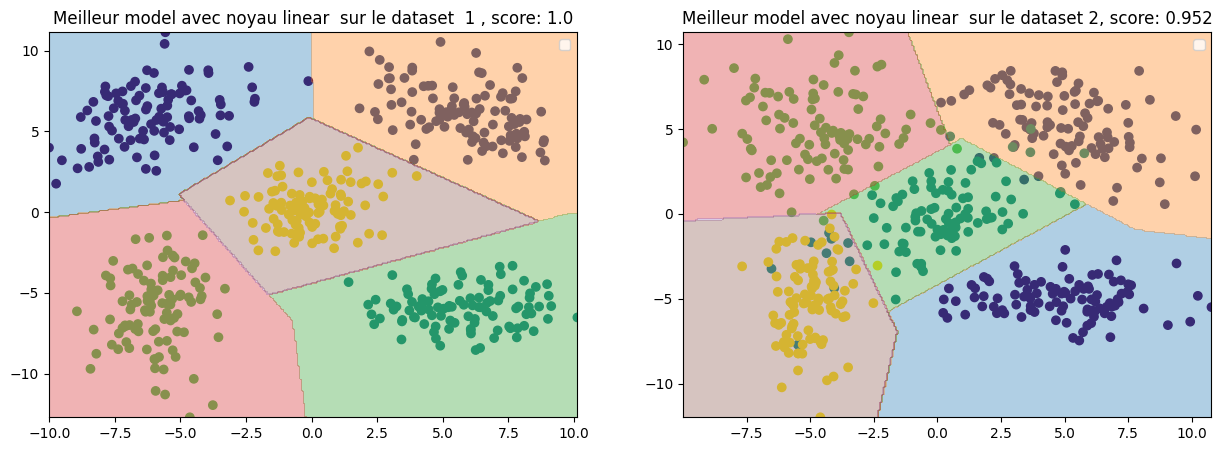

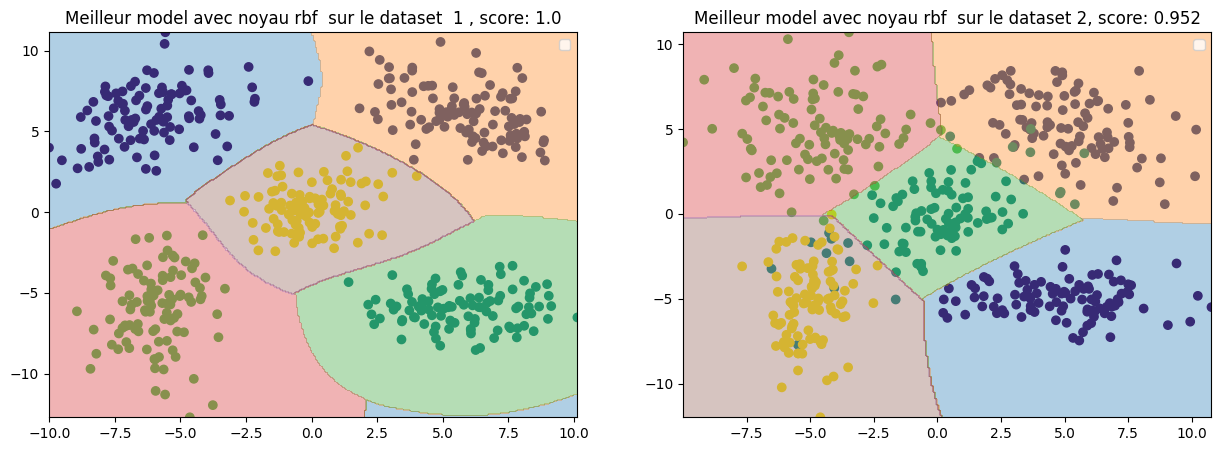

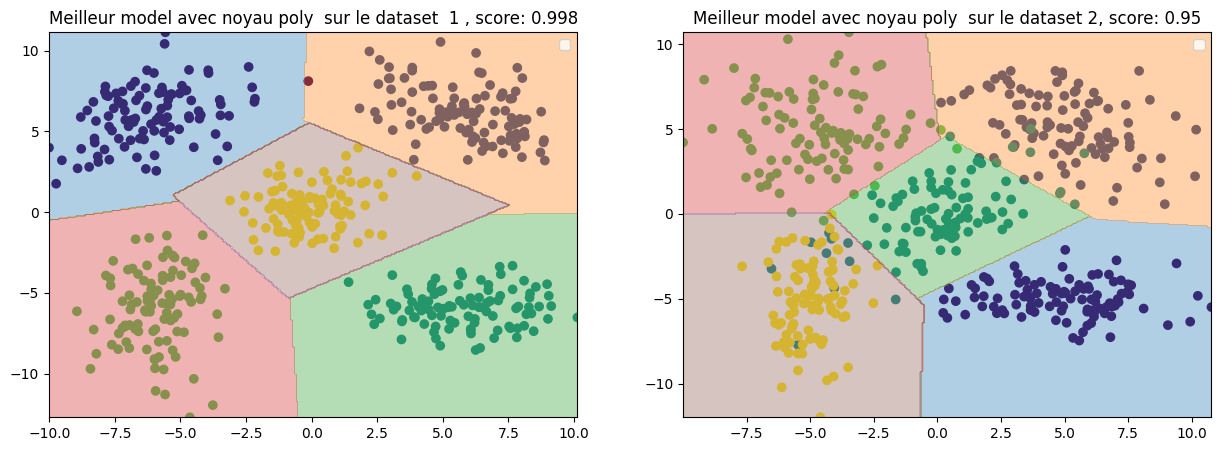

In [582]:
grid_parametres = {
    "linear": {
        "C": [0.1, 0.5, 1, 2],
        "kernel": ["linear"]
    },
    "rbf" :{
        "C": [0.1, 0.5, 1, 2],
        "gamma": [1, 0.1, 0.01, 0.001],
        "kernel": ["rbf"]
    },
    "poly": {
        "C": [0.1, 1, 10, 100],
        "degree": [1, 2, 3, 4],
        "kernel": ["poly"]
    }
}
svc = SVC()
for name, param_ in grid_parametres.items():
    plt.subplots(1, 2, figsize=(15, 5), )

    grid_search = GridSearchCV(svc, param_, cv=5)
    grid_search.fit(data1[['x1','x2']],data1['y'])
    meil_parametre= grid_search.best_params_
    meilleur_model= grid_search.best_estimator_

    print(f"Meilleurs parametres pour le dataset 1 : {grid_search.best_params_}")
    print(f"Meilleur parametre score le dataset 1  : {grid_search.best_score_}")

    plt.subplot(1, 2, 1)
    plot_decision_frontiers(meilleur_model,np.array(data1[['x1','x2']]),data1['y'],plt)
    plt.title(f"Meilleur model avec noyau {name}  sur le dataset  1 , score: {grid_search.best_score_}")

    rid_search = GridSearchCV(svc, param_, cv=5)
    grid_search.fit(data2[['x1','x2']],data2['y'])
    meil_parametre= grid_search.best_params_
    meilleur_model= grid_search.best_estimator_

    print(f"Meilleur parametre pour le dataset 2  : {grid_search.best_params_}")
    print(f"Meilleur parametre score le dataset 1  : {grid_search.best_score_}")
    
    plt.subplot(1, 2, 2)
    plot_decision_frontiers(meilleur_model,np.array(data2[['x1','x2']]),data2['y'], plt)
    plt.title(f"Meilleur model avec noyau {name}  sur le dataset 2, score: {grid_search.best_score_}")



